In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd,numpy as np

In [3]:
churn_data=pd.read_csv("C:/Users/Hari/Desktop/place/logistics asignment/logisstic regression class files/churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data=pd.read_csv("C:/Users/Hari/Desktop/place/logistics asignment/logisstic regression class files/customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data=pd.read_csv("C:/Users/Hari/Desktop/place/logistics asignment/logisstic regression class files/internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [7]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [8]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
telecom.shape

(7043, 21)

In [10]:
telecom.size

147903

In [11]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [12]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [13]:
varlist=['PhoneService','PaperlessBilling','Churn','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
def binary_map(x):
    return x.map({'yes':1,'No':0})
telecom[varlist]=telecom[varlist].apply(binary_map)

In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0.0,Month-to-month,NaN,Electronic check,29.85,29.85,0.0,Female,...,NaN,0.0,No phone service,DSL,0.0,NaN,0.0,0.0,0.0,0.0
1,5575-GNVDE,34,NaN,One year,0.0,Mailed check,56.95,1889.5,0.0,Male,...,0.0,0.0,No,DSL,NaN,0.0,NaN,0.0,0.0,0.0
2,3668-QPYBK,2,NaN,Month-to-month,NaN,Mailed check,53.85,108.15,NaN,Male,...,0.0,0.0,No,DSL,NaN,NaN,0.0,0.0,0.0,0.0
3,7795-CFOCW,45,0.0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0,Male,...,0.0,0.0,No phone service,DSL,NaN,0.0,NaN,NaN,0.0,0.0
4,9237-HQITU,2,NaN,Month-to-month,NaN,Electronic check,70.70,151.65,NaN,Female,...,0.0,0.0,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [16]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0.0,Month-to-month,NaN,Electronic check,29.85,29.85,0.0,Female,...,0.0,0.0,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,NaN,One year,0.0,Mailed check,56.95,1889.5,0.0,Male,...,0.0,0.0,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,NaN,Month-to-month,NaN,Mailed check,53.85,108.15,NaN,Male,...,0.0,0.0,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0.0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0,Male,...,0.0,0.0,1,0,0,0,0,1,0,0
4,9237-HQITU,2,NaN,Month-to-month,NaN,Electronic check,70.70,151.65,NaN,Female,...,0.0,0.0,0,0,0,1,0,0,1,0


In [17]:
telecom.tail(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
7038,6840-RESVB,24,NaN,One year,NaN,Mailed check,84.80,1990.5,0.0,Male,...,NaN,NaN,1,0,0,0,1,1,0,0
7039,2234-XADUH,72,NaN,One year,NaN,Credit card (automatic),103.20,7362.9,0.0,Female,...,NaN,NaN,1,0,1,0,0,0,1,0
7040,4801-JZAZL,11,0.0,Month-to-month,NaN,Electronic check,29.60,346.45,0.0,Female,...,0.0,0.0,0,0,0,1,0,0,0,0
7041,8361-LTMKD,4,NaN,Month-to-month,NaN,Mailed check,74.40,306.6,NaN,Male,...,0.0,0.0,0,0,0,0,1,1,1,0
7042,3186-AJIEK,66,NaN,Two year,NaN,Bank transfer (automatic),105.65,6844.5,0.0,Male,...,NaN,NaN,0,1,0,0,0,1,1,0


In [18]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

In [19]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,1,0.0,Month-to-month,NaN,Electronic check,29.85,29.85,0.0,Female,...,0,0,0,1,0,0,0,0,0,0
1,5575-GNVDE,34,NaN,One year,0.0,Mailed check,56.95,1889.5,0.0,Male,...,1,0,0,0,1,1,0,0,1,0
2,3668-QPYBK,2,NaN,Month-to-month,NaN,Mailed check,53.85,108.15,NaN,Male,...,0,0,0,0,1,1,0,0,1,0
3,7795-CFOCW,45,0.0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0,Male,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,2,NaN,Month-to-month,NaN,Electronic check,70.70,151.65,NaN,Female,...,0,0,0,1,0,0,1,0,1,0


In [34]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           682 non-null    float64
 3   PaperlessBilling                       2872 non-null   float64
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  5174 non-null   float64
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                3641 non-null   float64
 9   Dependents                             4933 non-null   float64
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [35]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [36]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
90%,69.000000,102.600000,1.000000
95%,72.000000,107.400000,1.000000
99%,72.000000,114.729000,1.000000


In [28]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                  0
tenure                                      0
PhoneService                             6361
PaperlessBilling                         4171
MonthlyCharges                              0
TotalCharges                                0
Churn                                    1869
SeniorCitizen                               0
Partner                                  3402
Dependents                               2110
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check                  0
gender_Male                                 0
InternetService_Fiber optic                 0
InternetService_No                          0
MultipleLines_No                            0
MultipleLines_Yes                           0
dtype: int64

In [29]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                                0.00
tenure                                    0.00
PhoneService                             90.32
PaperlessBilling                         59.22
MonthlyCharges                            0.00
TotalCharges                              0.00
Churn                                    26.54
SeniorCitizen                             0.00
Partner                                  48.30
Dependents                               29.96
Contract_One year                         0.00
Contract_Two year                         0.00
PaymentMethod_Credit card (automatic)     0.00
PaymentMethod_Electronic check            0.00
PaymentMethod_Mailed check                0.00
gender_Male                               0.00
InternetService_Fiber optic               0.00
InternetService_No                        0.00
MultipleLines_No                          0.00
MultipleLines_Yes                         0.00
dtype: float64

In [30]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                                0.00
tenure                                    0.00
PhoneService                             90.32
PaperlessBilling                         59.22
MonthlyCharges                            0.00
TotalCharges                              0.00
Churn                                    26.54
SeniorCitizen                             0.00
Partner                                  48.30
Dependents                               29.96
Contract_One year                         0.00
Contract_Two year                         0.00
PaymentMethod_Credit card (automatic)     0.00
PaymentMethod_Electronic check            0.00
PaymentMethod_Mailed check                0.00
gender_Male                               0.00
InternetService_Fiber optic               0.00
InternetService_No                        0.00
MultipleLines_No                          0.00
MultipleLines_Yes                         0.00
dtype: float64

In [41]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                                0.00
tenure                                    0.00
PhoneService                             90.32
PaperlessBilling                         59.22
MonthlyCharges                            0.00
TotalCharges                              0.00
Churn                                    26.54
SeniorCitizen                             0.00
Partner                                  48.30
Dependents                               29.96
Contract_One year                         0.00
Contract_Two year                         0.00
PaymentMethod_Credit card (automatic)     0.00
PaymentMethod_Electronic check            0.00
PaymentMethod_Mailed check                0.00
gender_Male                               0.00
InternetService_Fiber optic               0.00
InternetService_No                        0.00
MultipleLines_No                          0.00
MultipleLines_Yes                         0.00
dtype: float64

# Step 4: Test-Train Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes
0,1,0.0,NaN,29.85,29.85,0,NaN,0.0,0,0,0,1,0,0,0,0,0,0
1,34,NaN,0.0,56.95,1889.5,0,0.0,0.0,1,0,0,0,1,1,0,0,1,0
2,2,NaN,NaN,53.85,108.15,0,0.0,0.0,0,0,0,0,1,1,0,0,1,0
3,45,0.0,0.0,42.30,1840.75,0,0.0,0.0,1,0,0,0,0,1,0,0,0,0
4,2,NaN,NaN,70.70,151.65,0,0.0,0.0,0,0,0,1,0,0,1,0,1,0


In [44]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0.0
1    0.0
2    NaN
3    0.0
4    NaN
Name: Churn, dtype: float64

In [45]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes
877,0.754422,0.0,0.0,-0.145568,3077,0,0.0,NaN,1,0,0,0,0,0,0,0,0,0
5792,-0.710751,NaN,NaN,1.051796,1426.75,1,0.0,0.0,0,0,0,0,1,0,1,0,1,0
5334,0.673024,NaN,NaN,1.437668,5293.2,0,NaN,NaN,0,1,0,0,0,0,1,0,0,1
878,1.120716,NaN,0.0,0.006794,4039.5,0,0.0,0.0,1,0,0,1,0,0,0,0,0,1
6578,-0.914247,NaN,0.0,0.298268,693.3,0,0.0,NaN,1,0,1,0,0,0,0,0,0,1


In [50]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

nan

In [51]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

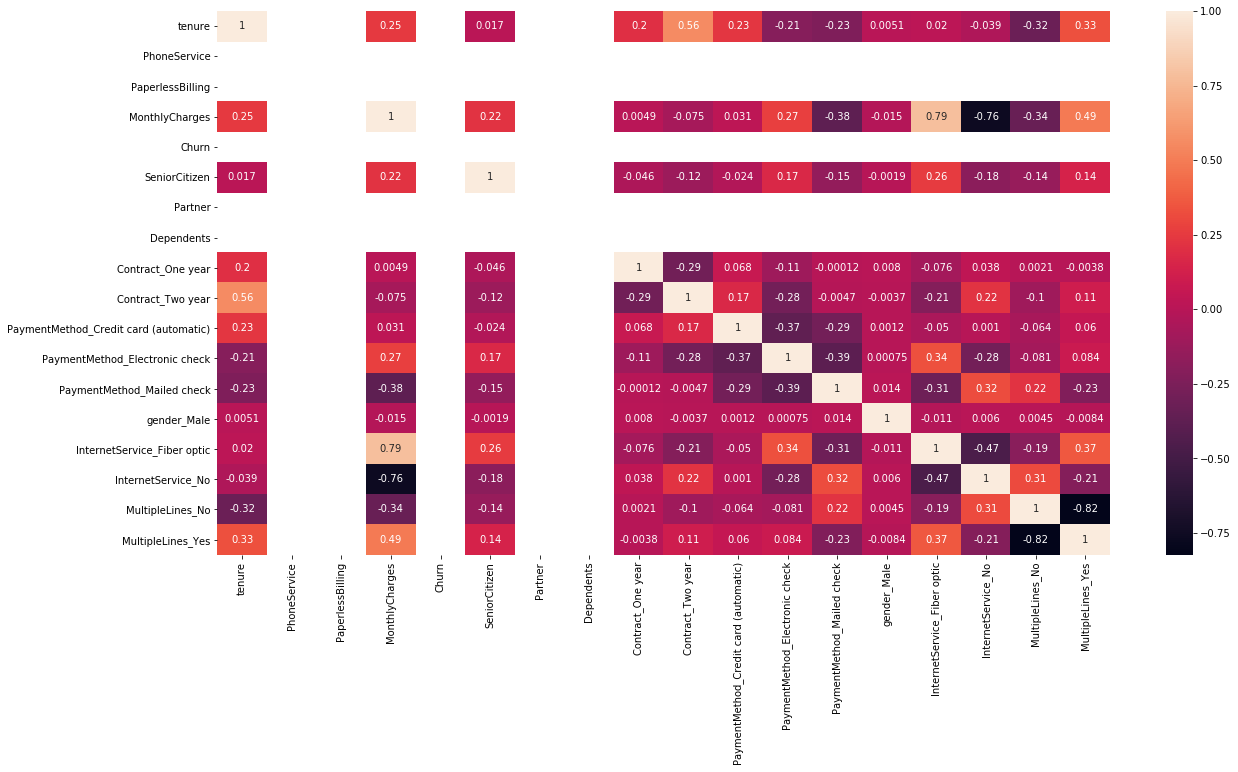

In [52]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()